# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from ipywidgets import interact
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load full database
# this pickle file is generated by the notebook data_consolidation.ipynb
df = pickle.load(open("../data/dataset_consolidated.p", "rb"))

In [4]:
# Load metadata
# this pickle file is generated by the notebook data_consolidation.ipynb
meta = pickle.load(open("../data/metadata.p", "rb"))

### Data at first sight

Here is an excerpt of the the data description from the file README.txt:

* Dataset Description: Inertial Measurement Unit Fall Detection Dataset (IMU Dataset)

* IMU Dataset is a dataset devised to benchmark fall detection and prediction algorithms based on **acceleration, angular velocity and magnetic fields** of body-worn APDM Opal IMU sensors at 7 body locations (right ankle, left ankle, right thigh, left thigh, head, sternum, and waist).

* Each one of the 10 subject underwent 60 trials (15 Activity of Daily Livings - ADLs, 24 Falls, and 15 Near Falls)

#### Dataset columns
- Time: timestamp (the number of microseconds that has elapsed since 1 January 1970), unit = uS
- r.ankle Acceleration X (m/s^2): Right ankle's acceleration along X axis, unit = m/s^2
- r.ankle Acceleration Y (m/s^2): Right ankle's acceleration along Y axis, unit = m/s^2
- r.ankle Acceleration Z (m/s^2): Right ankle's acceleration along Z axis, unit = m/s^2
- r.ankle Angular Velocity X (rad/s): Right ankle's angular velocity along X axis, unit = rad/s
- r.ankle Angular Velocity Y (rad/s): Right ankle's angular velocity along Y axis, unit = rad/s
- r.ankle Angular Velocity Z (rad/s): Right ankle's angular velocity along Z axis, unit = rad/s
- r.ankle Magnetic Field X (uT): Right ankle's magnetic field along X axis, unit = uT
- r.ankle Magnetic Field Y (uT): Right ankle's magnetic field along Y axis, unit = uT
- r.ankle Magnetic Field Z (uT): Right ankle's magnetic field along Z axis, unit = uT
- l.ankle Acceleration X (m/s^2): Left ankle's acceleration along X axis, unit = m/s^2
- l.ankle Acceleration Y (m/s^2): Left ankle's acceleration along Y axis, unit = m/s^2
- l.ankle Acceleration Z (m/s^2): Left ankle's acceleration along Z axis, unit = m/s^2
- l.ankle Angular Velocity X (rad/s): Left ankle's angular velocity along X axis, unit = rad/s
- l.ankle Angular Velocity Y (rad/s): Left ankle's angular velocity along Y axis, unit = rad/s
- l.ankle Angular Velocity Z (rad/s): Left ankle's angular velocity along Z axis, unit = rad/s
- l.ankle Magnetic Field X (uT): Left ankle's magnetic field along X axis, unit = uT
- l.ankle Magnetic Field Y (uT): Left ankle's magnetic field along Y axis, unit = uT
- l.ankle Magnetic Field Z (uT): Left ankle's magnetic field along Z axis, unit = uT
- r.thigh Acceleration X (m/s^2): Right thigh's acceleration along X axis, unit = m/s^2
- r.thigh Acceleration Y (m/s^2): Right thigh's acceleration along Y axis, unit = m/s^2
- r.thigh Acceleration Z (m/s^2): Right thigh's acceleration along Z axis, unit = m/s^2
- r.thigh Angular Velocity X (rad/s): Right thigh's angular velocity along X axis, unit = rad/s
- r.thigh Angular Velocity Y (rad/s): Right thigh's angular velocity along Y axis, unit = rad/s
- r.thigh Angular Velocity Z (rad/s): Right thigh's angular velocity along Z axis, unit = rad/s
- r.thigh Magnetic Field X (uT): Right thigh's magnetic field along X axis, unit = uT
- r.thigh Magnetic Field Y (uT): Right thigh's magnetic field along Y axis, unit = uT
- r.thigh Magnetic Field Z (uT): Right thigh's magnetic field along Z axis, unit = uT
- l.thigh Acceleration X (m/s^2): Left thigh's acceleration along X axis, unit = m/s^2
- l.thigh Acceleration Y (m/s^2): Left thigh's acceleration along Y axis, unit = m/s^2
- l.thigh Acceleration Z (m/s^2): Left thigh's acceleration along Z axis, unit = m/s^2
- l.thigh Angular Velocity X (rad/s): Left thigh's angular velocity along X axis, unit = rad/s
- l.thigh Angular Velocity Y (rad/s): Left thigh's angular velocity along Y axis, unit = rad/s
- l.thigh Angular Velocity Z (rad/s): Left thigh's angular velocity along Z axis, unit = rad/s
- l.thigh Magnetic Field X (uT): Left thigh's magnetic field along X axis, unit = uT
- l.thigh Magnetic Field Y (uT): Left thigh's magnetic field along Y axis, unit = uT
- l.thigh Magnetic Field Z (uT): Left thigh's magnetic field along Z axis, unit = uT
- head Acceleration X (m/s^2): Head's acceleration along X axis, unit = m/s^2
- head Acceleration Y (m/s^2): Head's acceleration along Y axis, unit = m/s^2
- head Acceleration Z (m/s^2): Head's acceleration along Z axis, unit = m/s^2
- head Angular Velocity X (rad/s): Head's angular velocity along X axis, unit = rad/s
- head Angular Velocity Y (rad/s): Head's angular velocity along Y axis, unit = rad/s
- head Angular Velocity Z (rad/s): Head's angular velocity along Z axis, unit = rad/s
- head Magnetic Field X (uT): Head's magnetic field along X axis, unit = uT
- head Magnetic Field Y (uT): Head's magnetic field along Y axis, unit = uT
- head Magnetic Field Z (uT): Head's magnetic field along Z axis, unit = uT
- sternum Acceleration X (m/s^2): Sternum's acceleration along X axis, unit = m/s^2
- sternum Acceleration Y (m/s^2): Sternum's acceleration along Y axis, unit = m/s^2
- sternum Acceleration Z (m/s^2): Sternum's acceleration along Z axis, unit = m/s^2
- sternum Angular Velocity X (rad/s): Sternum's angular velocity along X axis, unit = rad/s
- sternum Angular Velocity Y (rad/s): Sternum's angular velocity along Y axis, unit = rad/s
- sternum Angular Velocity Z (rad/s): Sternum's angular velocity along Z axis, unit = rad/s
- sternum Magnetic Field X (uT): Sternum's magnetic field along X axis, unit = uT
- sternum Magnetic Field Y (uT): Sternum's magnetic field along Y axis, unit = uT
- sternum Magnetic Field Z (uT): Sternum's magnetic field along Z axis, unit = uT
- waist Acceleration X (m/s^2): Waist's acceleration along X axis, unit = m/s^2
- waist Acceleration Y (m/s^2): Waist's acceleration along Y axis, unit = m/s^2
- waist Acceleration Z (m/s^2): Waist's acceleration along Z axis, unit = m/s^2
- waist Angular Velocity X (rad/s): Waist's angular velocity along X axis, unit = rad/s
- waist Angular Velocity Y (rad/s): Waist's angular velocity along Y axis, unit = rad/s
- waist Angular Velocity Z (rad/s): Waist's angular velocity along Z axis, unit = rad/s
- waist Magnetic Field X (uT): Waist's magnetic field along X axis, unit = uT
- waist Magnetic Field Y (uT): Waist's magnetic field along Y axis, unit = uT
- waist Magnetic Field Z (uT): Waist's magnetic field along Z axis, unit = uT

#### Units
- Aceleration: $m/s^2$
- Angular Velocity: rad/s
- Magnectic Field: uT

#### Notes
- The columns below were included to improve the analysis and are not from the original dataset:
    * **time_datetime:** represent the date and time of the measure in format YYYY-MM-DD HH:MM:SS.SSSSSS
    * **time_seconds:** represent the delta in microseconds for each trial, starting in zero
    * **subject:** subject (student with sensors) who executed the moviments to collect the data
    * **trial_type:** ADL, Fall or NonFall
    * **trial_num_original:** trial number. This data was extracted from the original file name.    
    * **trial_num:** also trial number, but with counting restarted in 1
    * **trial_subtype:** type of movement of the trial: standing still, picking object from the floor, etc.
    * **FileName:** name of the Excel file with original data
    * **target:** classification as fall (1) or non fall (0)


<hr>

## Overview of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190369 entries, 0 to 1920
Data columns (total 94 columns):
Time                                  1190369 non-null int64
time_datetime                         1190369 non-null datetime64[ns]
time_seconds                          1190369 non-null float64
subject                               1190369 non-null int64
trial_type                            1190369 non-null object
trial_num                             1190369 non-null int64
trial_num_original                    1190369 non-null int64
trial_subtype                         1190369 non-null object
r.ankle Acceleration X (m/s^2)        1190369 non-null float64
r.ankle Acceleration Y (m/s^2)        1190369 non-null float64
r.ankle Acceleration Z (m/s^2)        1190369 non-null float64
r.ankle Angular Velocity X (rad/s)    1190369 non-null float64
r.ankle Angular Velocity Y (rad/s)    1190369 non-null float64
r.ankle Angular Velocity Z (rad/s)    1190369 non-null float64
r.ankle Mag

### Conclusions:

Data well structured, with no null values and with the proper type for each of the columns.

<hr>

## Checking the distribution of the types of trials

Text(0,0.5,'Qtd of measurements')

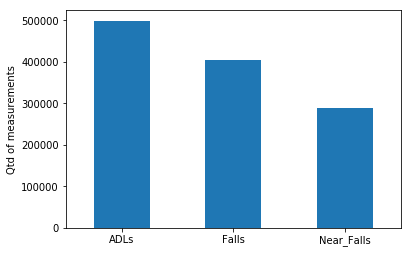

In [6]:
dist = df.trial_type.value_counts()
fig, ax = plt.subplots()
dist.plot(kind='bar',ax=ax)
plt.xticks(rotation=0)
ax.set_ylabel('Qtd of measurements')

### Conclusion:

Classes are unbalanced. During the model training we will try also balance the data. However, due this type of problem, real data will be really unbalanced since non falls and ADLs are much more frequent then falls, on average.


<hr>

### Checking duplicates

In [7]:
print('Before: ',df.shape)
df = df.drop_duplicates()
print('After:  ', df.shape)

Before:  (1190369, 94)
After:   (1190369, 94)


#### Conclusion: 

No duplicates

<hr>

## SubTypes dictionary

In [8]:
subtype_dict = {
            'AS'   : 'ascending stairs', 
            'DS'   : 'descending stairs', 
            'DSL'  : 'descending from standing to lying', 
            'DSS'  : 'descending from standing to sitting', 
            'HB'   : 'hit and bump by another person', 
            'ITCS' : 'incorrect shift of bodyweight due to misstep',
            'ITDS' : 'incorrect shift of bodyweight while descending', 
            'ITRS' : 'incorrect shift of bodyweight while rising from a chair', 
            'LCC'  : 'loss/colapse of consciousness', 
            'NW'   : 'normal walking', 
            'POG'  : 'picking object from the ground', 
            'RSS'  : 'rising from sitting', 
            'slip' : 'slips', 
            'SQ'   : 'standing quietly', 
            'trip' : 'trip'
    }

# Combination of the trials

Group the types, subtypes (including descriptions) and the number of trials and subjects for each

In [12]:
df_conbination_trials = df[['trial_type','trial_subtype','trial_num']].drop_duplicates()
df_conbination_subjects = df[['trial_type','trial_subtype','subject']].drop_duplicates()

df_conbination_trials['trial_subtype_desc'] = df_conbination_trials.trial_subtype.apply(lambda x: subtype_dict[x])
df_conbination_subjects['trial_subtype_desc'] = df_conbination_subjects.trial_subtype.apply(lambda x: subtype_dict[x])

df_conbination_trials = df_conbination_trials.groupby(['trial_type','trial_subtype', 'trial_subtype_desc']).count()
df_conbination_subjects = df_conbination_subjects.groupby(['trial_type','trial_subtype', 'trial_subtype_desc']).count()

df_conbination = df_conbination_trials.join(df_conbination_subjects)

df_conbination.rename(columns = {'trial_num':'number of trials', 'subject':'number of subjects'})

number of trials  \
trial_type trial_subtype trial_subtype_desc                                                     
ADLs       AS            ascending stairs                                                   3   
           DS            descending stairs                                                  3   
           DSL           descending from standing to lying                                  3   
           DSS           descending from standing to sitting                                3   
           NW            normal walking                                                     3   
           POG           picking object from the ground                                     3   
           RSS           rising from sitting                                                3   
           SQ            standing quietly                                                   3   
Falls      HB            hit and bump by another person                                     3   
           ITCS          incorrect shift of bodyweight due to misstep                       3   
           ITDS          incorrect shift of bodyweight while descending                     3   
           ITRS          incorrect shift of bodyweight while rising from...                 3   
           LCC           loss/colapse of consciousness                                      3   
           slip          slips                                                              3   
           trip          trip                                                               3   
Near_Falls HB            hit and bump by another person                                     3   
           ITCS          incorrect shift of bodyweight due to misstep                       3   
           ITRS          incorrect shift of bodyweight while rising from...                 3   
           slip          slips                                                              3   
           trip          trip                                                               3   

                                                                             number of subjects  
trial_type trial_subtype trial_subtype_desc                                                      
ADLs       AS            ascending stairs                                                    10  
           DS            descending stairs                                                   10  
           DSL           descending from standing to lying                                   10  
           DSS           descending from standing to sitting                                 10  
           NW            normal walking                                                      10  
           POG           picking object from the ground                                      10  
           RSS           rising from sitting                                                 10  
           SQ            standing quietly                                                    10  
Falls      HB            hit and bump by another person                                      10  
           ITCS          incorrect shift of bodyweight due to misstep                        10  
           ITDS          incorrect shift of bodyweight while descending                      10  
           ITRS          incorrect shift of bodyweight while rising from...                  10  
           LCC           loss/colapse of consciousness                                       10  
           slip          slips                                                               10  
           trip          trip                                                                10  
Near_Falls HB            hit and bump by another person                                      10  
           ITCS          incorrect shift of bodyweight due to misstep                        10  
           ITRS          incorrect shift of bodyweight while rising from...     

### Conclusion:

As informed by the owner of the dataset, there is 3 * 10 trials for each of the trial subtypes

# Results of trials

Plots to show all the subtypes per trial for one subject. This [dashboard](dashboard.ipynb) present an interative way to select the subject, types and trial numbers to check the readings of the sensors.

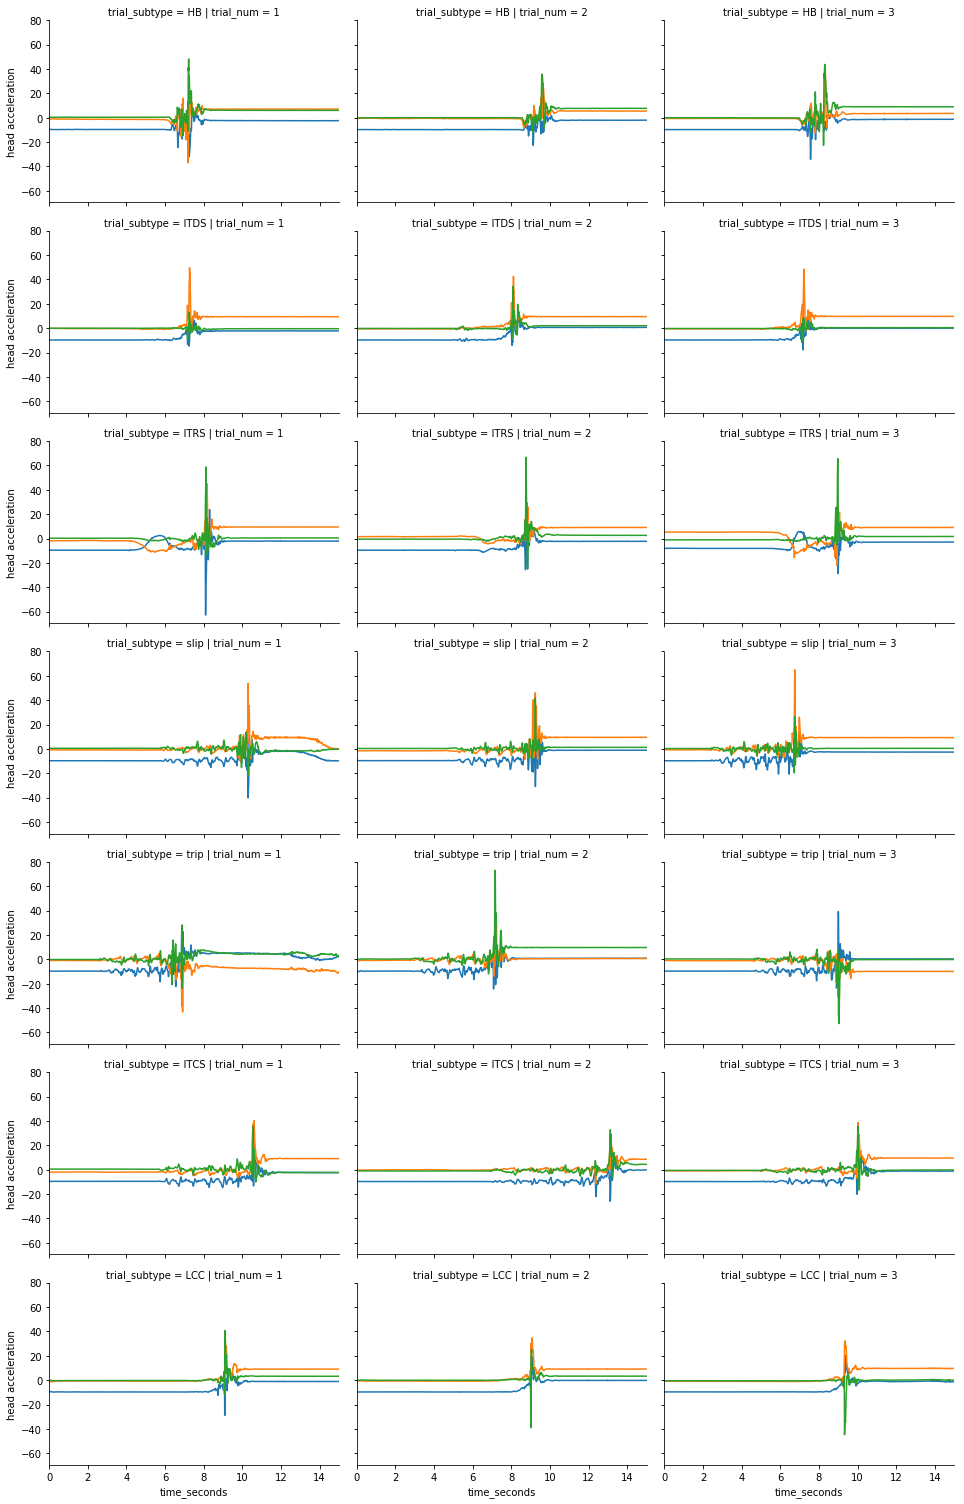

In [13]:
def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
    
def plot_facedgrid_by_trial_type(df, trial_type, subject=1, location='waist', measure='acceleration'):

    body_location_columns = list(meta[(meta.body_location==location) & (meta.measure == measure)].index) 

    df_graph = df[(df.trial_type == trial_type) &
       (df.subject == subject)]
    
    df_body = df_graph[['time_seconds','trial_subtype', 'trial_num']+body_location_columns]

    df_body_X = df_graph[['time_seconds','trial_subtype', 'trial_num']+[body_location_columns[0]]]
    df_body_X.rename(columns={body_location_columns[0] : str(location + ' ' + measure)},inplace=True)
    df_body_X['axis'] = 'x'

    df_body_Y = df_graph[['time_seconds','trial_subtype', 'trial_num']+[body_location_columns[1]]]
    df_body_Y.rename(columns={body_location_columns[1] : str(location + ' ' + measure)},inplace=True)
    df_body_Y['axis'] = 'y'

    df_body_Z = df_graph[['time_seconds','trial_subtype', 'trial_num']+[body_location_columns[2]]]
    df_body_Z.rename(columns={body_location_columns[2] : str(location + ' ' + measure)},inplace=True)
    df_body_Z['axis'] = 'z'

    df_body = pd.concat([df_body_X, df_body_Y, df_body_Z])
    
    df_body = df_body[['time_seconds']+[str(location + ' ' + measure)]+['trial_subtype', 'trial_num', 'axis']]
    df_body.sort_values(['trial_num'],inplace=True)

    g = sns.FacetGrid(df_body.sort_values(['time_seconds','trial_num']), 
                      col="trial_num", row='trial_subtype', hue='axis',size=3, aspect=1.5) 
    g = g.map_dataframe(dateplot, "time_seconds", str(location + ' ' + measure))
    
#change the parameters according with the values above
plot_facedgrid_by_trial_type(df, trial_type='Falls', subject=1, location='head', measure='acceleration')    

## Result of the trials based on the resultant calculation (magnitude or vector sum) of the readings

The resultant calculation of a given tri-axial reading is obtained as follows (example with the waist acceleromenter):

## **$$WaistAcceleration_{resultant} = \sqrt{X^2 + Y^2 + Z^2}$$**

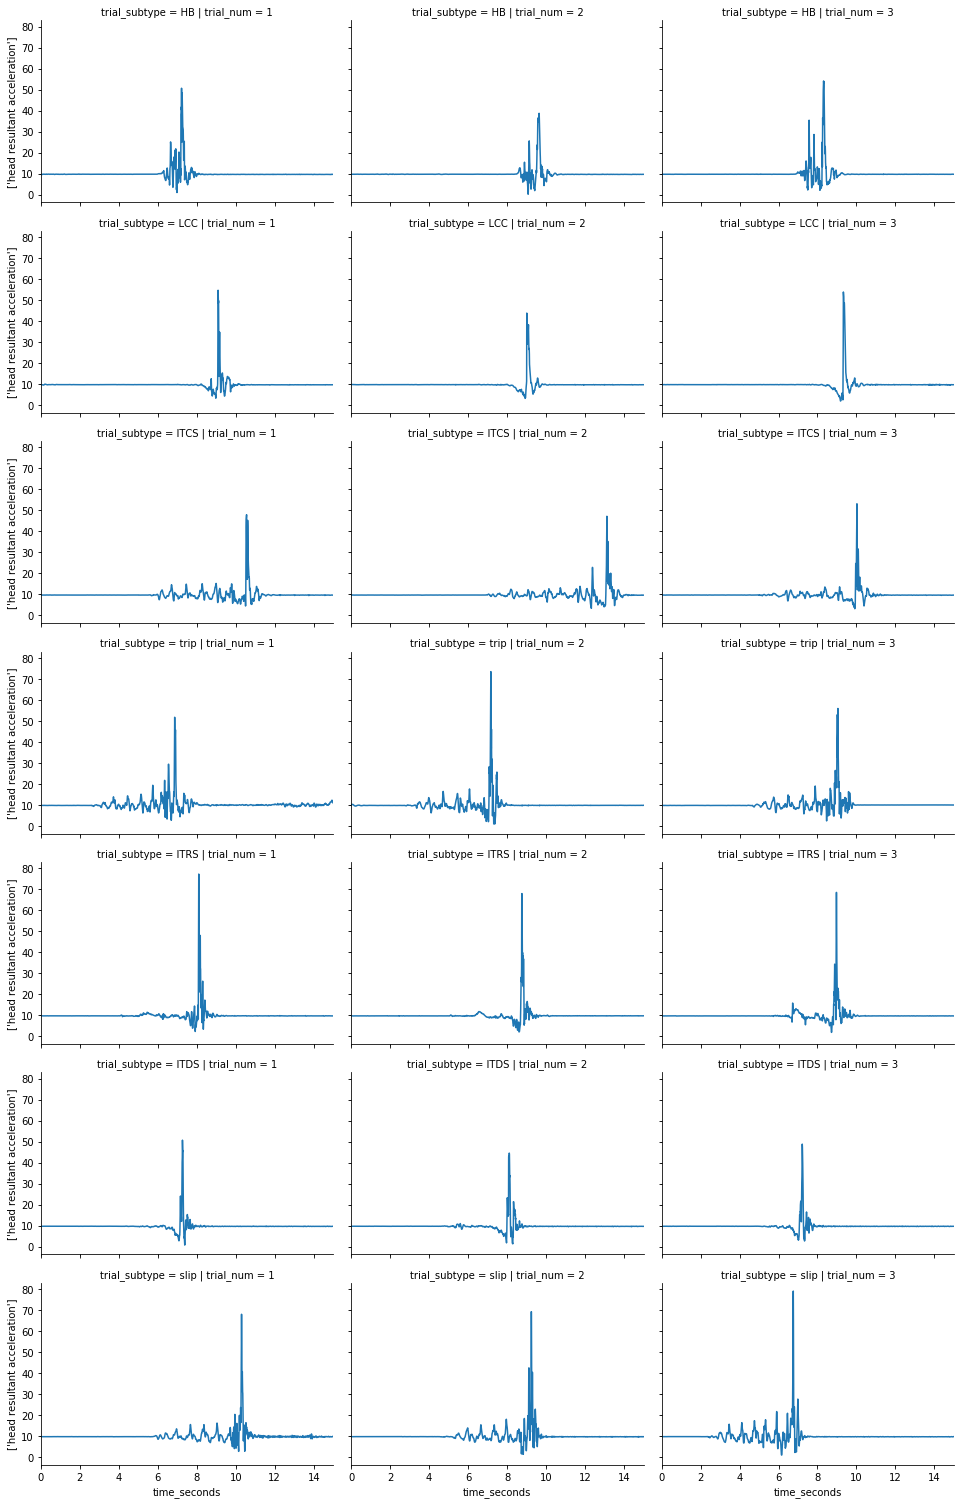

In [14]:
# plot the same graphics as above, but using the resultant measure instead of the X, Y, Z readings
def plot_facedgrid_by_resultant_values(df, trial_type, subject=1, location='waist', measure='acceleration'):

    body_location_columns = [str(location + ' resultant ' + measure)]

    df_graph = df[(df.trial_type == trial_type) &
       (df.subject == subject)][['time_seconds','trial_subtype', 'trial_num']+body_location_columns]

    g = sns.FacetGrid(df_graph.sort_values(['time_seconds','trial_num']), 
                      col="trial_num", row='trial_subtype',
#                       sharex=False, sharey=False,
                      size=3, aspect=1.5) 
    g = g.map_dataframe(dateplot, "time_seconds", body_location_columns)
    
#change the parameters according with the values above
plot_facedgrid_by_resultant_values(df, trial_type='Falls', subject=1, location='head', measure='acceleration')   

### Conclusion:

Since the resultant data is a direct calculation for the axis X,Y,Z it was expected to have a similar behaviour

# Multivariate feature analysis

### Correlation among sensor readings

Calculate the Pearson Correlation among all features with sensor readings and select those above a threshold 0.3.

In [15]:
def plot_correlation_heatmap(df, columns, threshold):
    df = df[columns].corr()
    plt.figure(figsize=(24,18))
    sns.heatmap(df[(df >= threshold)],
            cmap='viridis', linewidths=0.01, annot=True)
    return df

#### Threshold = 0.3

In [16]:
threshold_correlation_raw_measures = 0.3

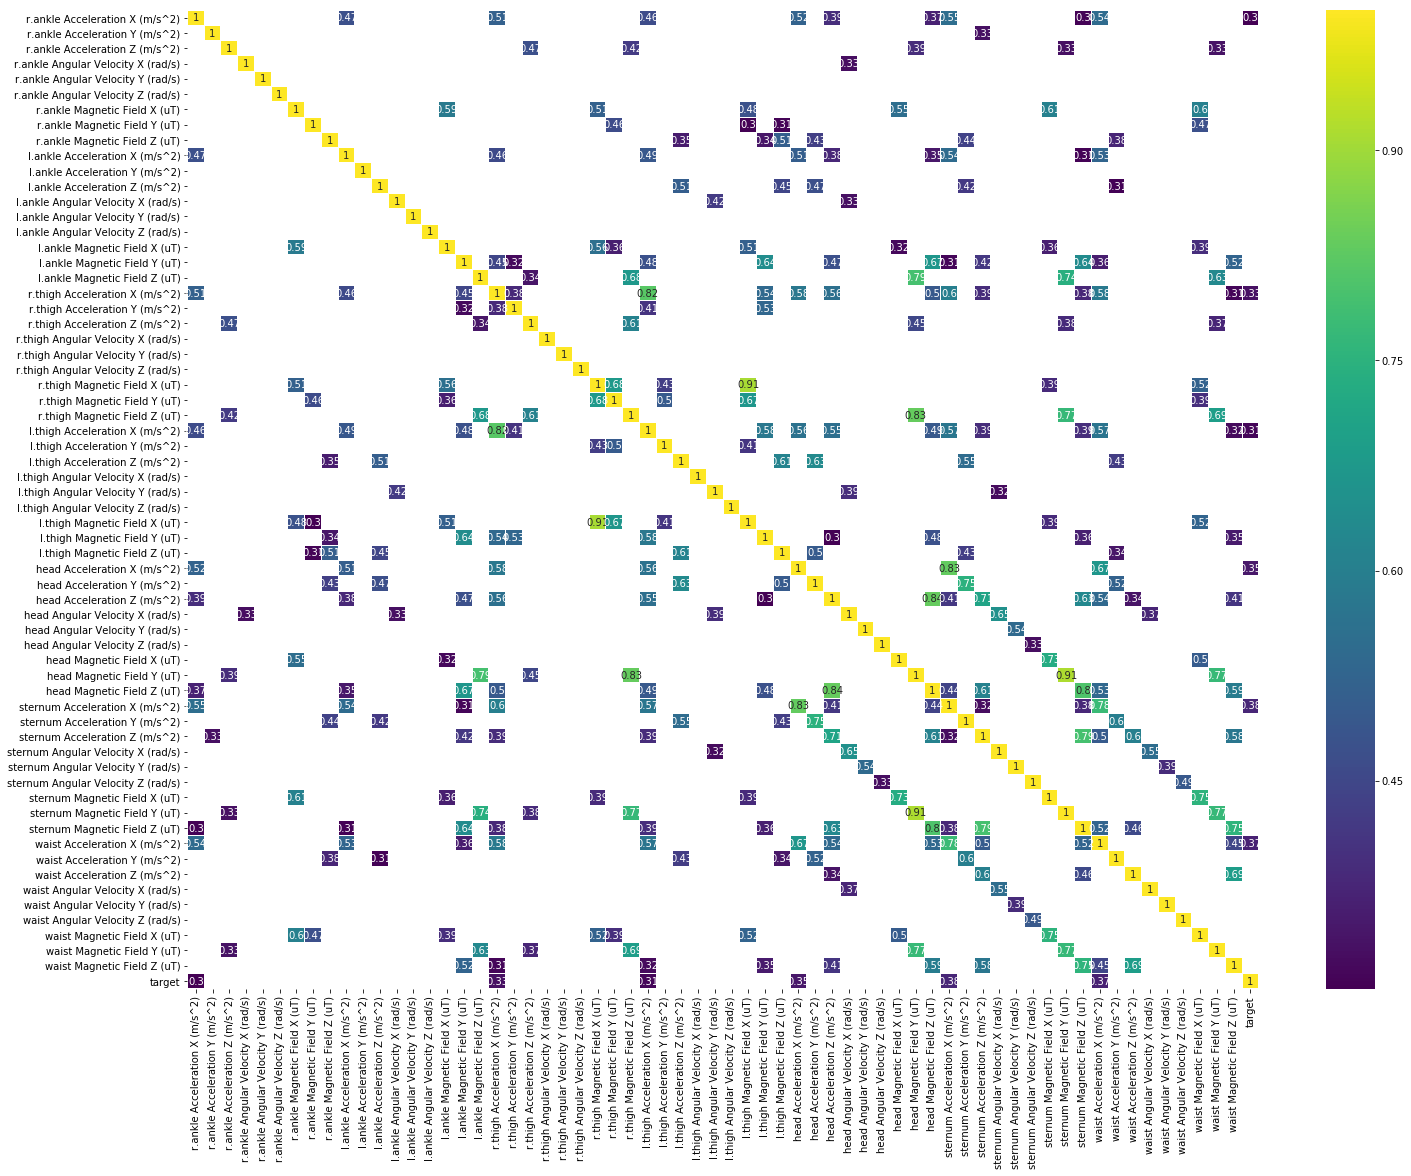

In [17]:
numerical_columns_raw = list(meta[(meta.body_location != '') & (meta.axis != 'XYZ')].index) + ['target']
df_corr_raw = plot_correlation_heatmap(df, numerical_columns_raw, threshold_correlation_raw_measures)

### List of measures whose correlation with target is larger than threshold:

In [18]:
best_corr_raw_measures = list(df_corr_raw[(df_corr_raw >= threshold_correlation_raw_measures)]['target'].dropna().drop('target').index)

print("Readings with HIGHEST correlation with target:")
      
for measure in best_corr_raw_measures:
    print(' - '+measure)

Readings with HIGHEST correlation with target:
 - r.ankle Acceleration X (m/s^2)
 - r.thigh Acceleration X (m/s^2)
 - l.thigh Acceleration X (m/s^2)
 - head Acceleration X (m/s^2)
 - sternum Acceleration X (m/s^2)
 - waist Acceleration X (m/s^2)


### Vizualize the relation among the most correlated features

In [19]:
from pandas.plotting import scatter_matrix

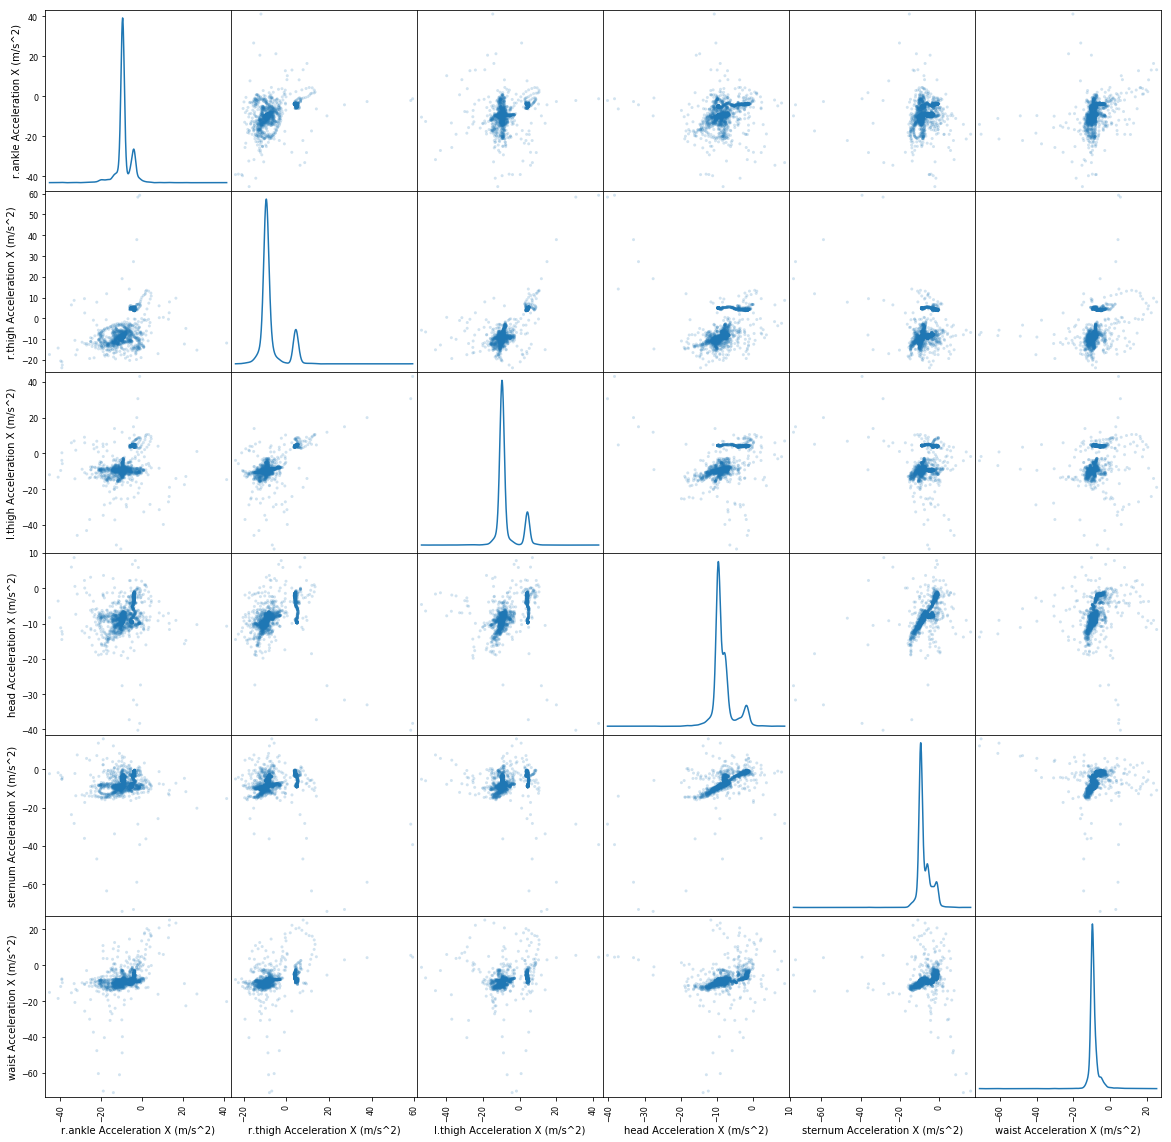

In [20]:
_ = scatter_matrix(df[(df.trial_subtype=='slip')&(df.trial_num==1)&(df.subject==1)][best_corr_raw_measures],
                   alpha=0.2, figsize=(20, 20), diagonal='kde')

## Individual correlations with target

#### Best correlations with target

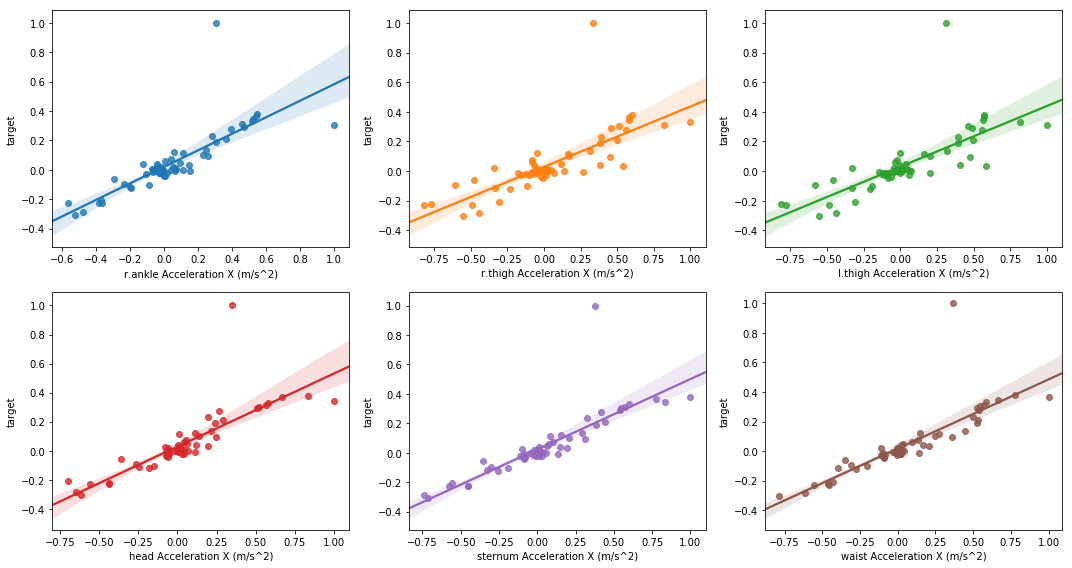

In [21]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(15,8))
sns.regplot(df_corr_raw[best_corr_raw_measures[0]],df_corr_raw.target, ax=ax1)
sns.regplot(df_corr_raw[best_corr_raw_measures[1]],df_corr_raw.target, ax=ax2)
sns.regplot(df_corr_raw[best_corr_raw_measures[2]],df_corr_raw.target, ax=ax3)
sns.regplot(df_corr_raw[best_corr_raw_measures[3]],df_corr_raw.target, ax=ax4)
sns.regplot(df_corr_raw[best_corr_raw_measures[4]],df_corr_raw.target, ax=ax5)
sns.regplot(df_corr_raw[best_corr_raw_measures[5]],df_corr_raw.target, ax=ax6)
plt.tight_layout()

# Resultant measures
### Correlation among sensor **resultant** calculations

Calculate the correlation of the resultant readings with the target and select those above the threshold

In [22]:
numerical_columns_resultant = list(meta[meta.axis == 'XYZ'].index) + ['target']

#### Threshold = 0.1

In [23]:
threshold_correlation_resultant_measures = 0.1

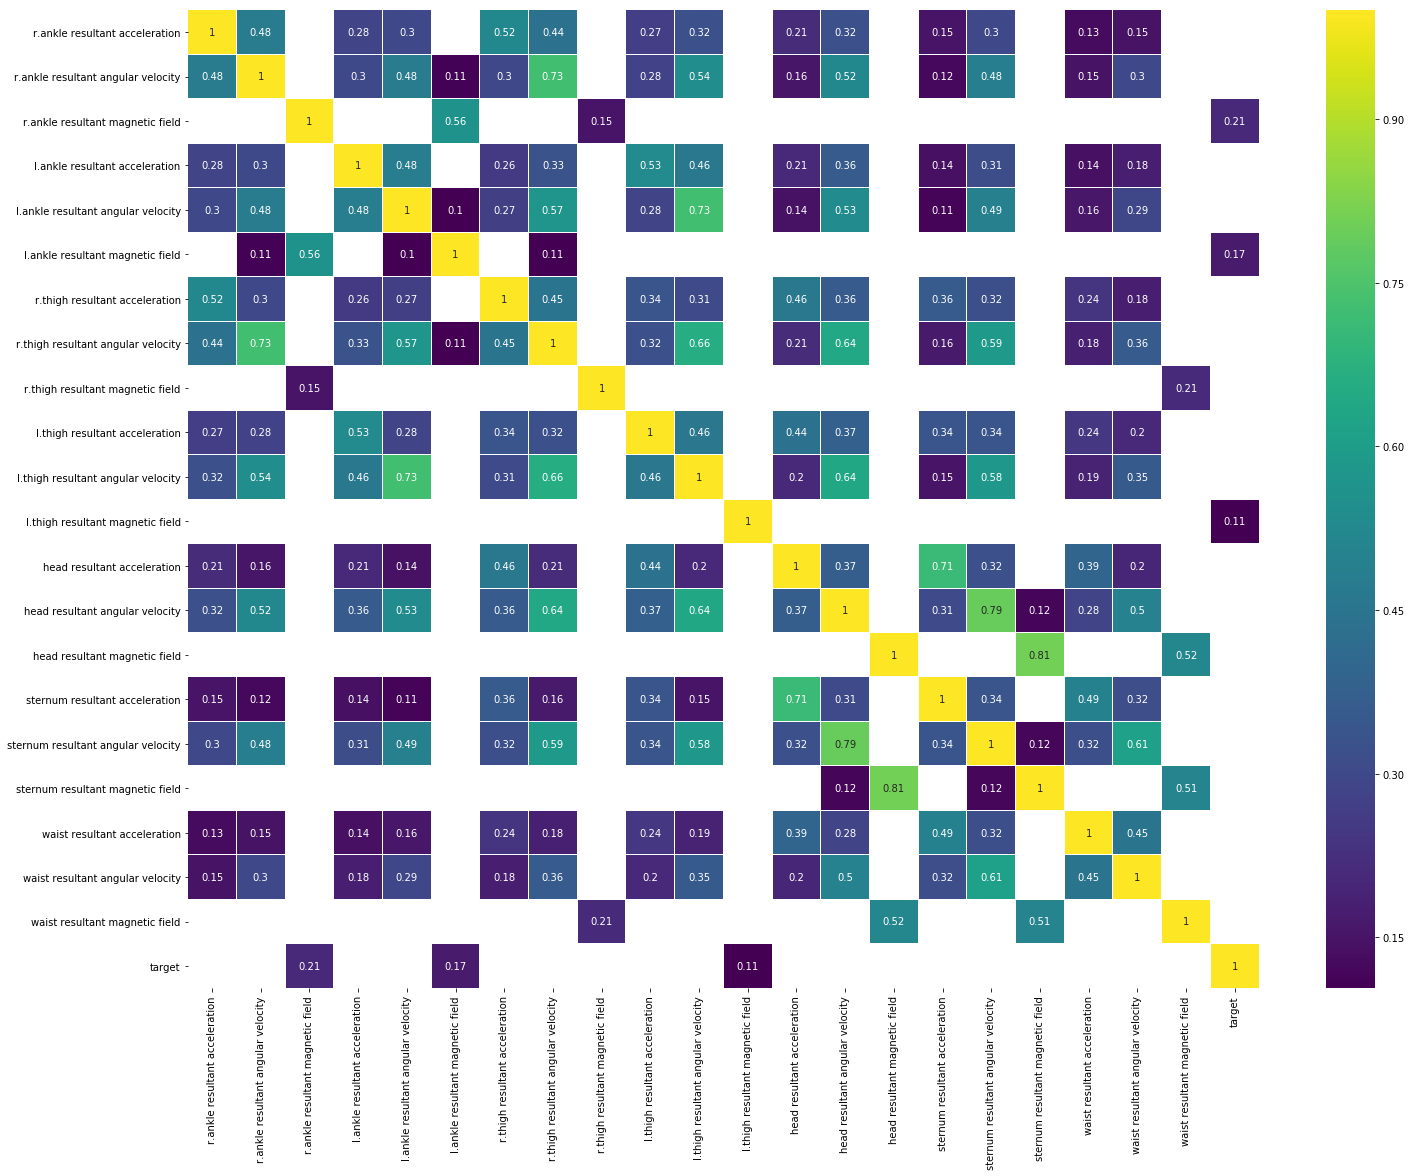

In [24]:
df_corr_resultant = plot_correlation_heatmap(df, numerical_columns_resultant, threshold_correlation_resultant_measures)

### List of measures whose correlation with target is larger than threshold:

In [25]:
best_corr_result_measures = list(df_corr_resultant[(df_corr_resultant >= threshold_correlation_resultant_measures)]['target'].dropna().drop('target').index)

print("Readings with HIGHEST correlation with target:")
      
for measure in best_corr_result_measures:
    print(' - '+measure)

Readings with HIGHEST correlation with target:
 - r.ankle resultant magnetic field
 - l.ankle resultant magnetic field
 - l.thigh resultant magnetic field


### Vizualize the relation among the most correlated features

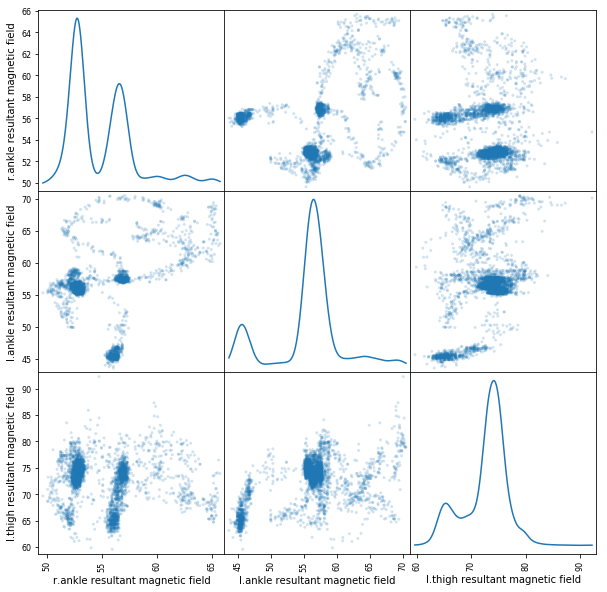

In [26]:
_ = scatter_matrix(df[(df.trial_subtype=='slip')&(df.trial_num==1)&(df.subject==1)][best_corr_result_measures],
                   alpha=0.2, figsize=(10,10), diagonal='kde')

## Individual correlation with target

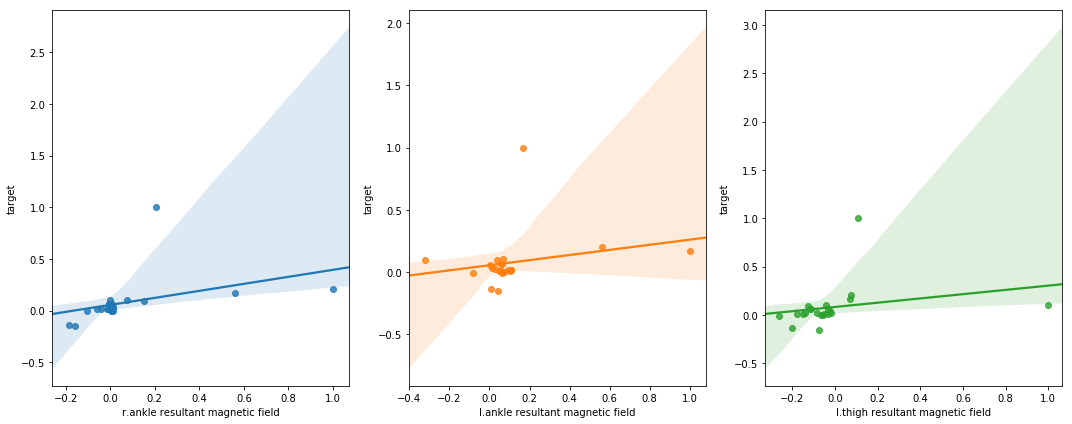

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(15,6))
sns.regplot(df_corr_resultant[best_corr_result_measures[0]],df_corr_resultant.target, ax=ax1)
sns.regplot(df_corr_resultant[best_corr_result_measures[1]],df_corr_resultant.target, ax=ax2)
sns.regplot(df_corr_resultant[best_corr_result_measures[2]],df_corr_resultant.target, ax=ax3)
plt.tight_layout()

## Getting interval around peak

In [28]:
# define the sensor to be used as primary to identify the moment of the fall, based on its value peak
main_sensor = 'waist'

In [29]:
# interval in seconds to be used around the peak to collect the data
interval = 4.0

### Getting the peak

The peak will be picked based on the acceleration resultant measure of the sensor defined in the variable "main_variable"

In [30]:
column_with_peak = main_sensor + ' resultant acceleration'

In [33]:
df_around_peaks = df.copy()

In [34]:
list_dfs_with_peaks = []
files = list(df.FileName.unique())
id_column_time_seconds = df.columns.get_loc("time_seconds")
for file in files:
    df_file = df[df.FileName == file]
    index_peak = df_file[column_with_peak].idxmax()
    seconds_peak = df_file.iloc[index_peak,id_column_time_seconds]
    list_dfs_with_peaks.append(df_file[
                                    (df_file.time_seconds >= seconds_peak - interval/2) &
                                    (df_file.time_seconds <= seconds_peak + interval/2)])
df_around_peaks = pd.concat(list_dfs_with_peaks, axis=0)    

# Plot filtered data

Plot all the subtypes with data around the peak

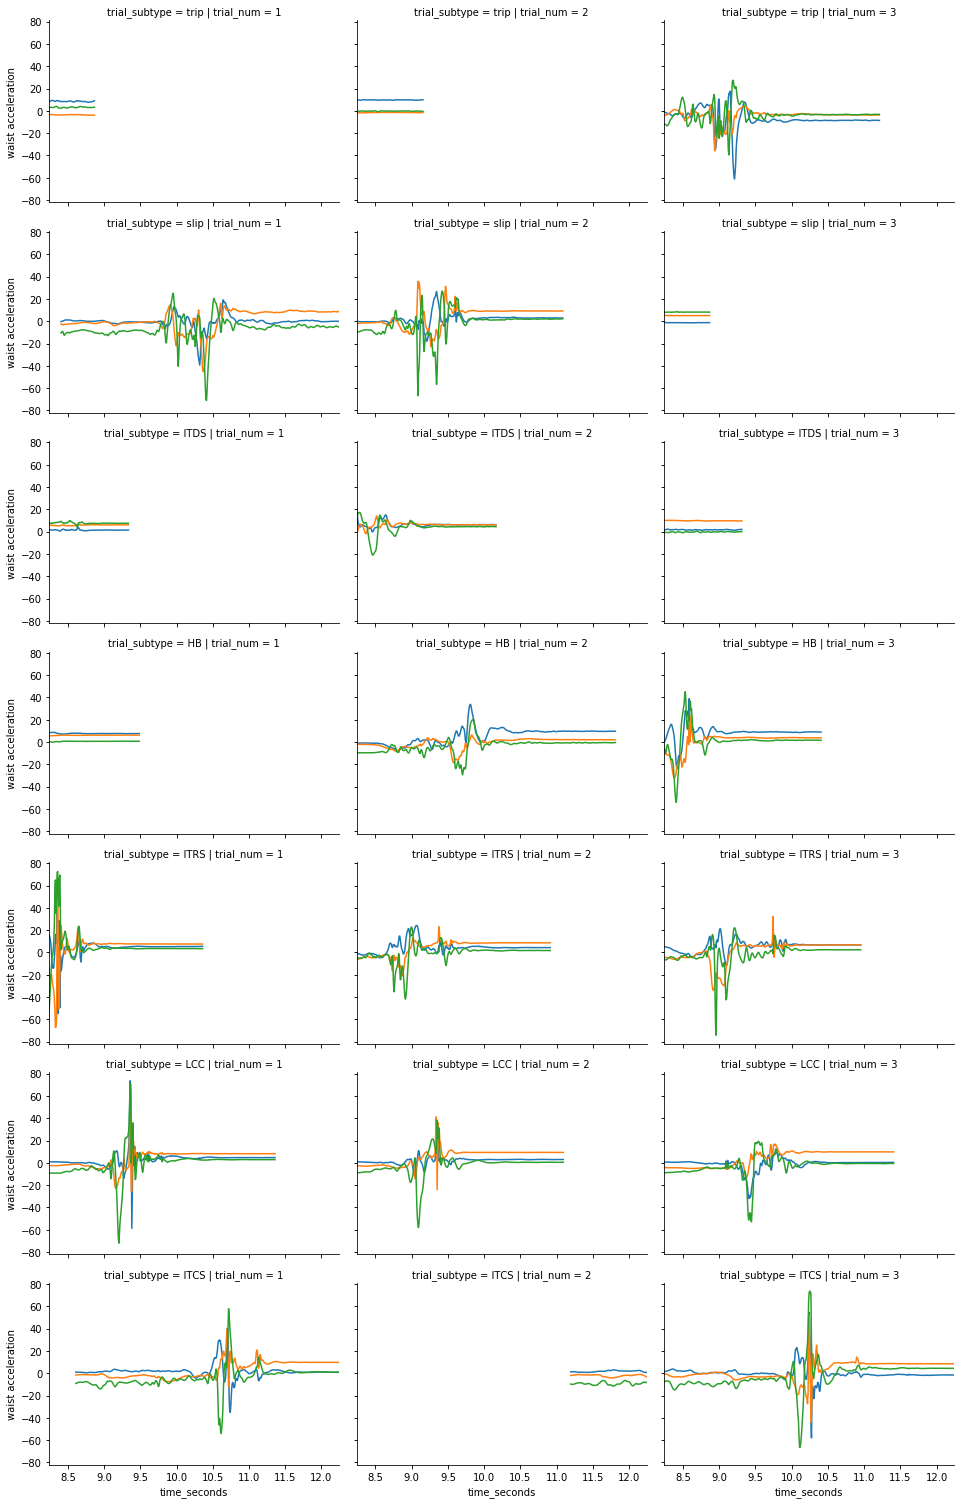

In [35]:
plot_facedgrid_by_trial_type(df_around_peaks, trial_type='Falls', subject=1, location='waist', measure='acceleration')    

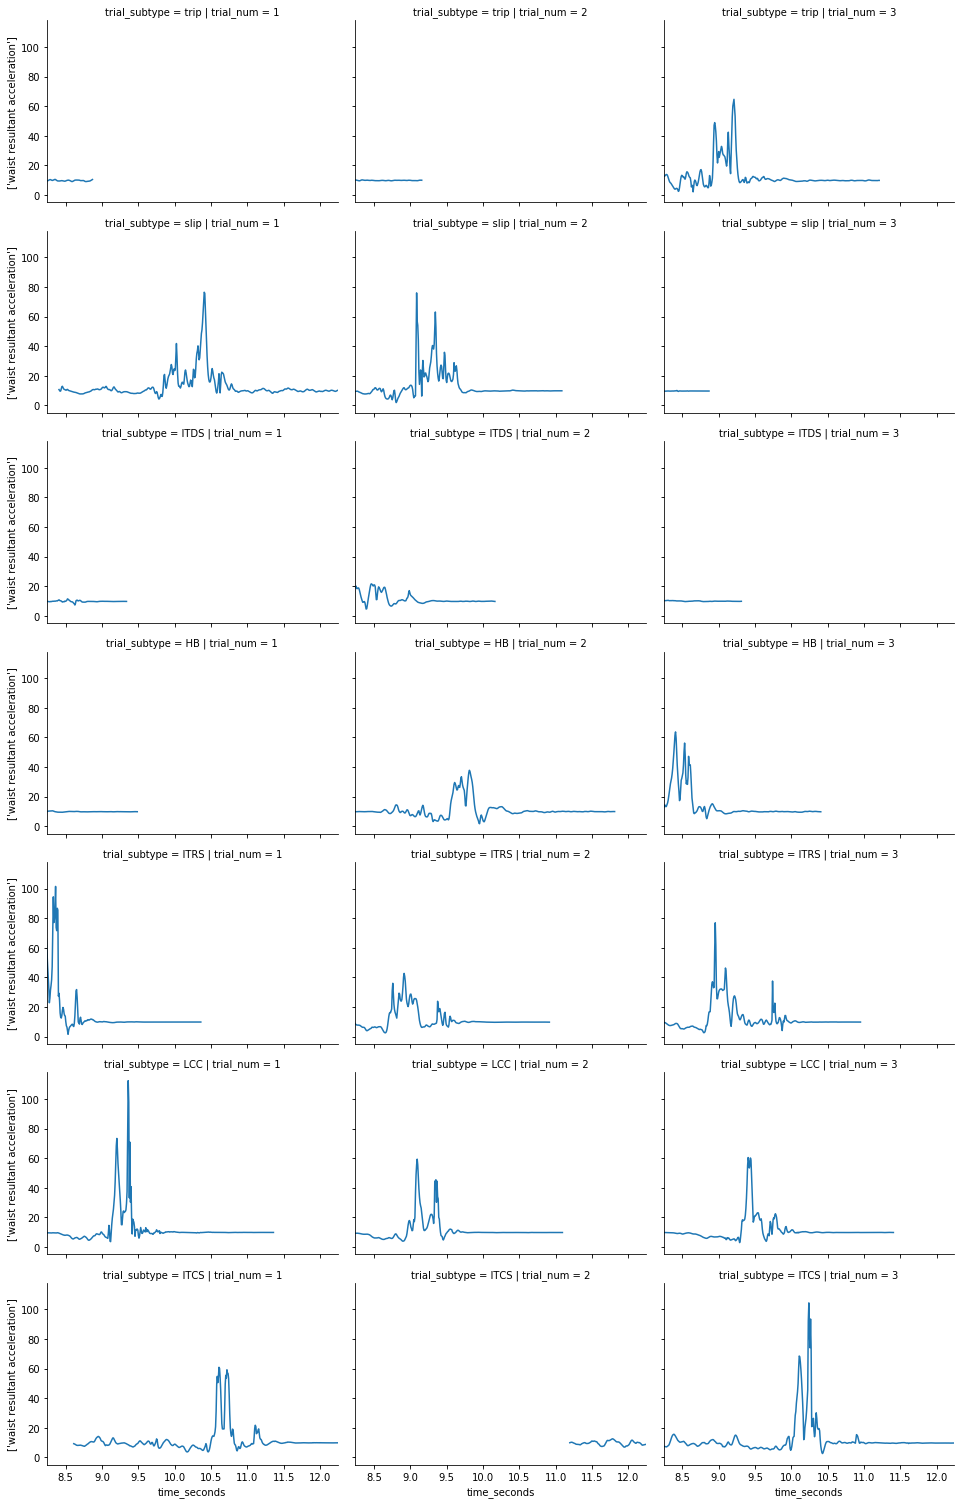

In [36]:
plot_facedgrid_by_resultant_values(df_around_peaks, trial_type='Falls', subject=1, location='waist', measure='acceleration')  

# Repeat correlation analysis

Repeat the analysis using only the data aroung the peak.

In [37]:
numerical_columns_raw = list(meta[(meta.body_location != '') & (meta.axis != 'XYZ')].index) + ['target']
threshold_correlation_raw_measures = 0.3

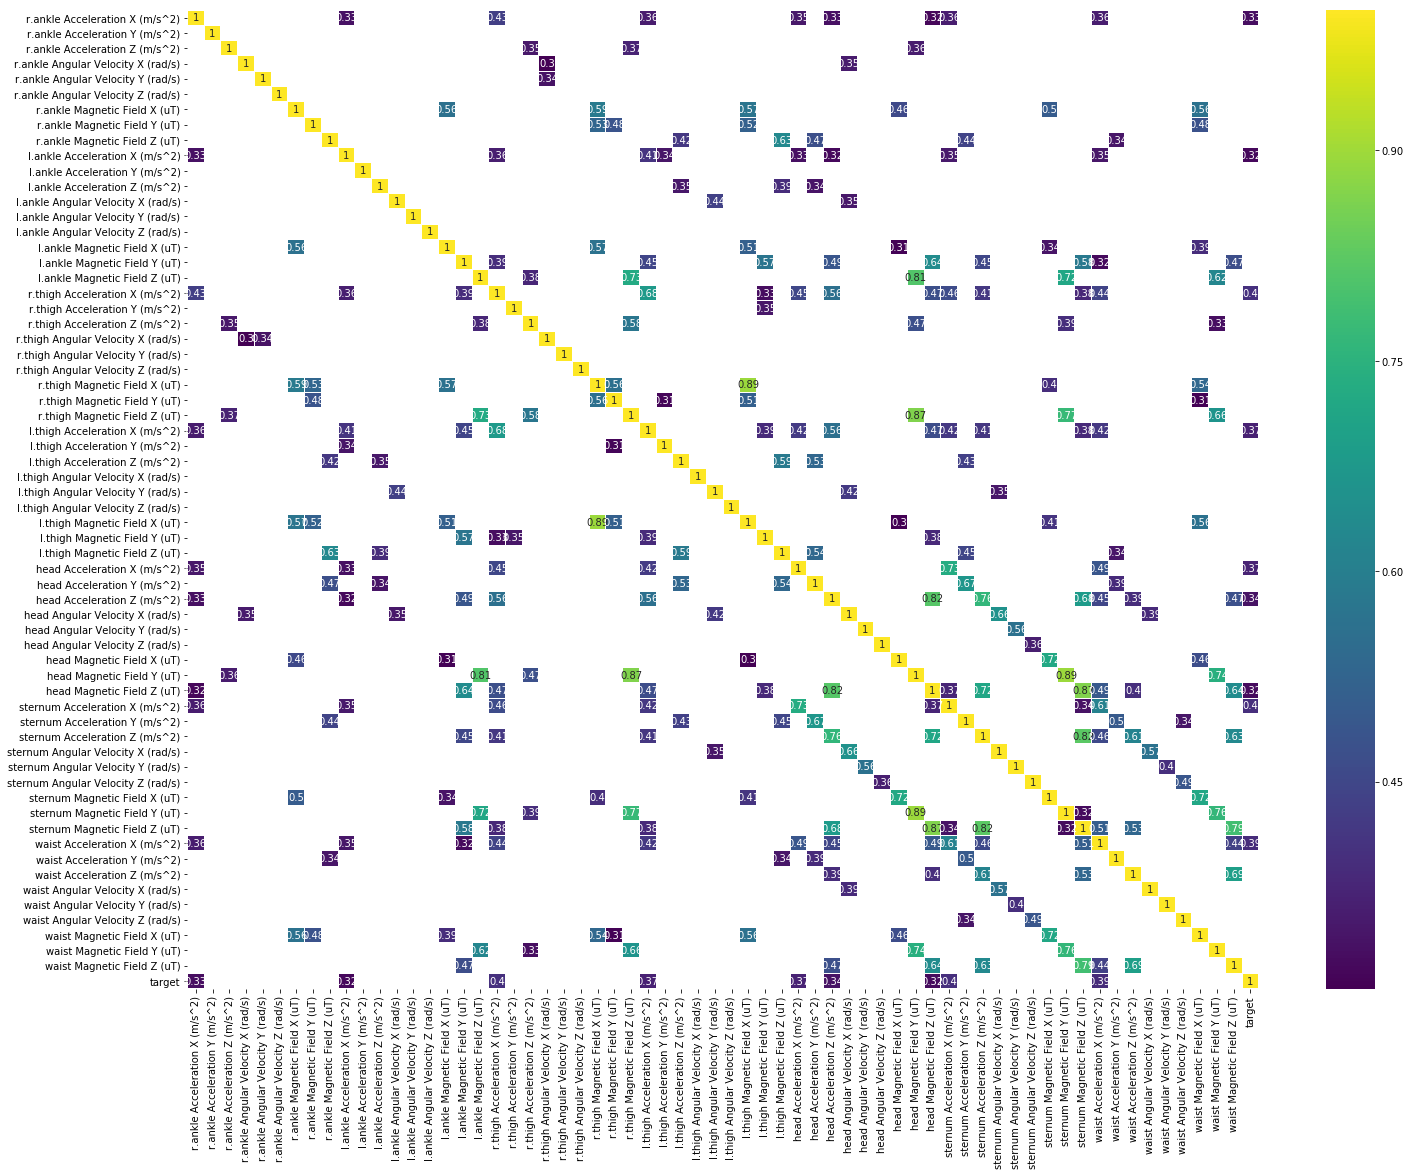

In [38]:
df_corr_raw = plot_correlation_heatmap(df_around_peaks, numerical_columns_raw, threshold_correlation_raw_measures)

In [39]:
best_corr_raw_measures = list(df_corr_raw[(df_corr_raw >= threshold_correlation_raw_measures)]['target'].dropna().drop('target').index)

print("Readings with HIGHEST correlation with target:")
      
for measure in best_corr_raw_measures:
    print(' - '+measure)

Readings with HIGHEST correlation with target:
 - r.ankle Acceleration X (m/s^2)
 - l.ankle Acceleration X (m/s^2)
 - r.thigh Acceleration X (m/s^2)
 - l.thigh Acceleration X (m/s^2)
 - head Acceleration X (m/s^2)
 - head Acceleration Z (m/s^2)
 - head Magnetic Field Z (uT)
 - sternum Acceleration X (m/s^2)
 - waist Acceleration X (m/s^2)


# Resultant data

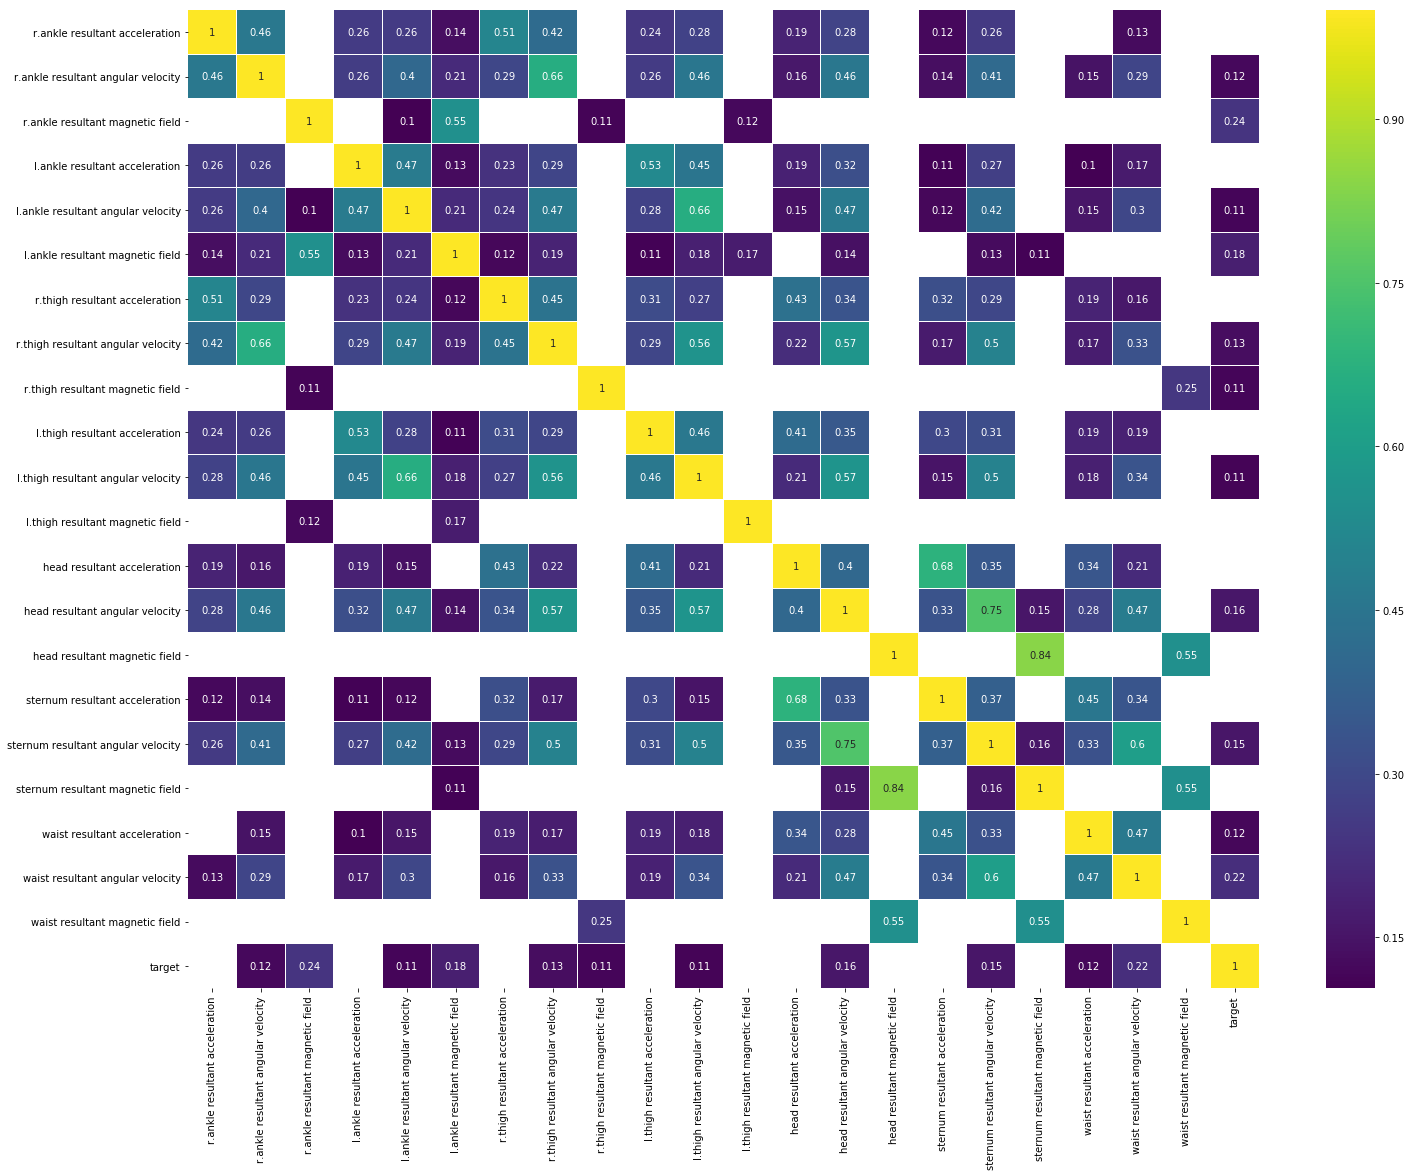

In [40]:
numerical_columns_resultant = list(meta[meta.axis == 'XYZ'].index) + ['target']
threshold_correlation_resultant_measures = 0.1

df_corr_resultant = plot_correlation_heatmap(df_around_peaks, numerical_columns_resultant, threshold_correlation_resultant_measures)

In [41]:
best_corr_result_measures = list(df_corr_resultant[(df_corr_resultant >= threshold_correlation_resultant_measures)]['target'].dropna().drop('target').index)

print("Readings with HIGHEST correlation with target:")
      
for measure in best_corr_result_measures:
    print(' - '+measure)

Readings with HIGHEST correlation with target:
 - r.ankle resultant angular velocity
 - r.ankle resultant magnetic field
 - l.ankle resultant angular velocity
 - l.ankle resultant magnetic field
 - r.thigh resultant angular velocity
 - r.thigh resultant magnetic field
 - l.thigh resultant angular velocity
 - head resultant angular velocity
 - sternum resultant angular velocity
 - waist resultant acceleration
 - waist resultant angular velocity


# Conclusions about the use of data around peak

Using raw readings with complete dataset:

Measurements with correlation > 0.3 to the Target:

 - r.ankle Acceleration X (m/s^2)
 - r.thigh Acceleration X (m/s^2)
 - l.thigh Acceleration X (m/s^2)
 - head Acceleration X (m/s^2)
 - sternum Acceleration X (m/s^2)
 - waist Acceleration X (m/s^2)
 
Using resultant readings with complete dataset:
 
Measurements with correlation > 0.1 to the Target:
 
 - r.ankle resultant magnetic field
 - l.ankle resultant magnetic field
 - l.thigh resultant magnetic field
 
 OBS: no resultant measure have a correlation > 0.3 with the target
 
Using data around peak (4 seconds):
 
Measurements with correlation > 0.3 to the Target:
 
 - r.ankle Acceleration X (m/s^2)
 - l.ankle Acceleration X (m/s^2)
 - r.thigh Acceleration X (m/s^2)
 - l.thigh Acceleration X (m/s^2)
 - head Acceleration X (m/s^2)
 - head Acceleration Z (m/s^2)
 - head Magnetic Field Z (uT)
 - sternum Acceleration X (m/s^2)
 - waist Acceleration X (m/s^2)
 
Measurements with correlation > 0.1 to the Target:
 
 - r.ankle resultant angular velocity
 - r.ankle resultant magnetic field
 - l.ankle resultant angular velocity
 - l.ankle resultant magnetic field
 - r.thigh resultant angular velocity
 - r.thigh resultant magnetic field
 - l.thigh resultant angular velocity
 - head resultant angular velocity
 - sternum resultant angular velocity
 - waist resultant acceleration
 - waist resultant angular velocity
 
 OBS: still no resultant measure have a correlation > 0.3 with the target